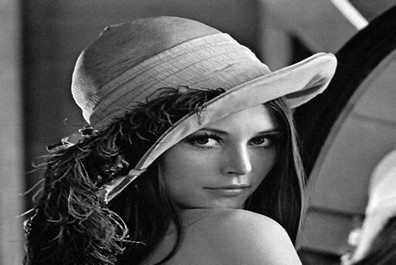

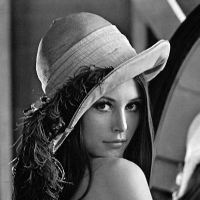

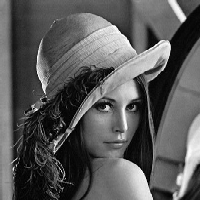

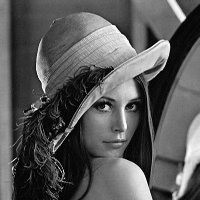

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

# Load an image
image_path = "/content/Picture1.jpg"  # Replace with your image path
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 1.1 Image Resizing
# Linear Interpolation
resized_linear = cv2.resize(image, (200, 200), interpolation=cv2.INTER_LINEAR)

# Nearest Neighbors
resized_nearest = cv2.resize(image, (200, 200), interpolation=cv2.INTER_NEAREST)

# Polynomial Interpolation (Cubic)
resized_cubic = cv2.resize(image, (200, 200), interpolation=cv2.INTER_CUBIC)

# Display Resized Images
cv2_imshow(image)  # Original
cv2_imshow(resized_linear)  # Resized - Linear
cv2_imshow(resized_nearest)  # Resized - Nearest
cv2_imshow(resized_cubic)  # Resized - Cubic



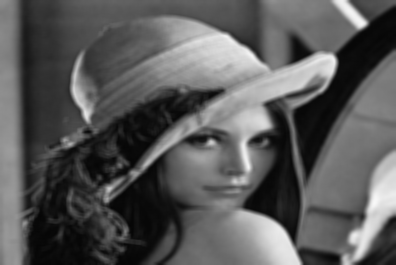

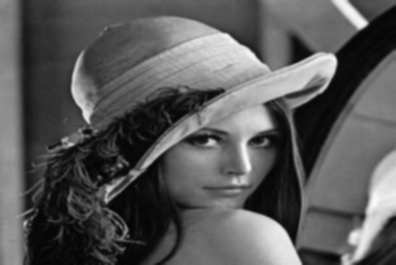

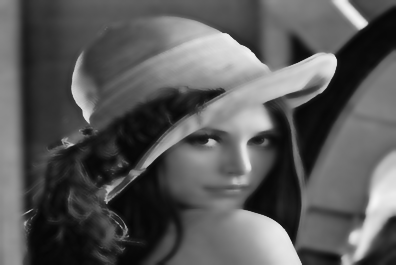

In [10]:
# 1.2 Image Blurring
blurred_box = cv2.blur(image_gray, (5, 5))

# Gaussian Blurring
blurred_gaussian = cv2.GaussianBlur(image_gray, (5, 5), 0)

# Adaptive Blurring (Bilateral Filter)
blurred_adaptive = cv2.bilateralFilter(image_gray, 9, 75, 75)

# Display Blurred Images
cv2_imshow(blurred_box)  # Box Blurring
cv2_imshow(blurred_gaussian)  # Gaussian Blurring
cv2_imshow(blurred_adaptive)  # Adaptive Blurring


Model: Naive Bayes
Accuracy: 0.85
Recall: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.83      0.86      0.84        28
           2       0.91      0.61      0.73        33
           3       0.91      0.85      0.88        34
           4       0.97      0.83      0.89        46
           5       0.90      0.94      0.92        47
           6       0.92      0.97      0.94        35
           7       0.69      0.97      0.80        34
           8       0.57      0.87      0.68        30
           9       0.96      0.65      0.78        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.84       360
weighted avg       0.88      0.85      0.85       360

Confusion Matrix:
[[31  0  0  0  0  1  0  1  0  0]
 [ 0 24  0  0  0  0  0  0  3  1]
 [ 0  2 20  0  0  0  1  0 10  0]
 [ 0  0  1 29  0  1  0  0  3  0]
 [ 0  0  0  0 38  0  

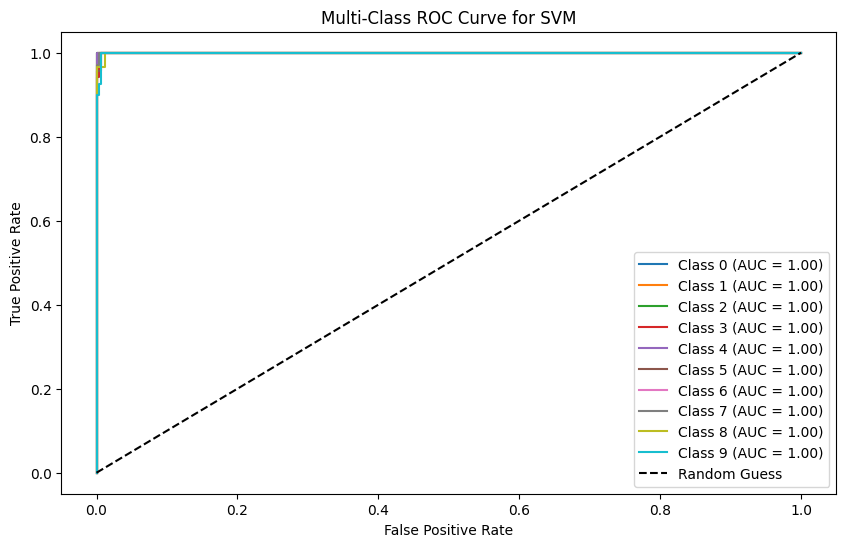

In [11]:
#TASK 2(2.1)
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    recall_score,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# One-hot encode labels for multi-class evaluation
y_binarized = label_binarize(y, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate models
def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average="weighted")
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    return y_pred

# Naive Bayes
nb_model = GaussianNB()
y_pred_nb = train_and_evaluate_model(nb_model, "Naive Bayes", X_train, X_test, y_train, y_test)

# SVM
svm_model = SVC(probability=True, kernel="linear")
y_pred_svm = train_and_evaluate_model(svm_model, "SVM", X_train, X_test, y_train, y_test)

# Multi-class ROC Curve for SVM
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_prob_svm = svm_model.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_svm[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob_svm[:, i])

# Plotting ROC Curves
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(np.linspace(0, 1, n_classes))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})", color=color)

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve for SVM")
plt.legend(loc="lower right")
plt.show()
